In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ======================================================
# 1. GENERAR DATOS SIMULADOS PARA EMPLEADOS
# ======================================================
np.random.seed(203)  # Usamos otra semilla para nuevos datos
n = 20  # Número de empleados

# años de experiencia laboral
anios_experiencia = np.random.uniform(1, 15, n)

# Relación lineal: Salario = 15000 + 3500*años_experiencia + ruido
# Se asume un salario base ($15,000) y un incremento por año de experiencia ($3,500).
# El ruido añade variabilidad realista.
ruido = np.random.uniform(-5000, 5000, n)
salario = 15000 + 3500 * anios_experiencia + ruido

# Crear el DataFrame
data = pd.DataFrame({'Anios_Experiencia': anios_experiencia, 'Salario': salario})

print("=== CONJUNTO DE DATOS GENERADO ===")
print(data)
print("\n")

=== CONJUNTO DE DATOS GENERADO ===
    Anios_Experiencia       Salario
0           12.870601  62001.435458
1            3.645138  31919.459552
2            7.308496  40237.408763
3            9.754861  46702.191248
4           14.576467  62484.865524
5            3.909294  33373.510992
6            9.322280  51477.243429
7           13.760396  58935.738432
8            4.439606  31070.826419
9           11.840253  60851.680911
10           9.907874  47908.957132
11          12.038849  60348.110809
12          13.322825  58715.485700
13           6.118139  35834.215725
14           9.307277  45457.367879
15           8.082516  39025.821253
16           9.753996  53100.673223
17          10.181720  50135.423260
18           1.173066  14747.859929
19           8.314679  42497.872056




In [8]:
# ======================================================
# 2. DEFINIR VARIABLES Y ENTRENAR EL MODELO
# ======================================================
X = data[['Anios_Experiencia']]  # Predictor
y = data['Salario']           # Respuesta
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes del modelo aprendido
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print("=== PARÁMETROS DEL MODELO APRENDIDO ===")
print(f"Intercepto (β₀): {beta_0:.4f}")
print(f"Pendiente (β₁): {beta_1:.4f}")
print(f"Modelo de Desempeño: Salario = {beta_0:.4f} + {beta_1:.4f} * Años Exp.\n")

=== PARÁMETROS DEL MODELO APRENDIDO ===
Intercepto (β₀): 15962.9703
Pendiente (β₁): 3382.3547
Modelo de Desempeño: Salario = 15962.9703 + 3382.3547 * Años Exp.



In [33]:
# ======================================================
# 3. EVALUACIÓN DEL MODELO
# ======================================================
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

=== EVALUACIÓN DEL MODELO ===
Coeficiente de Determinación (R²): 0.9385
Root Mean Squared Error (RMSE): 3104.9041



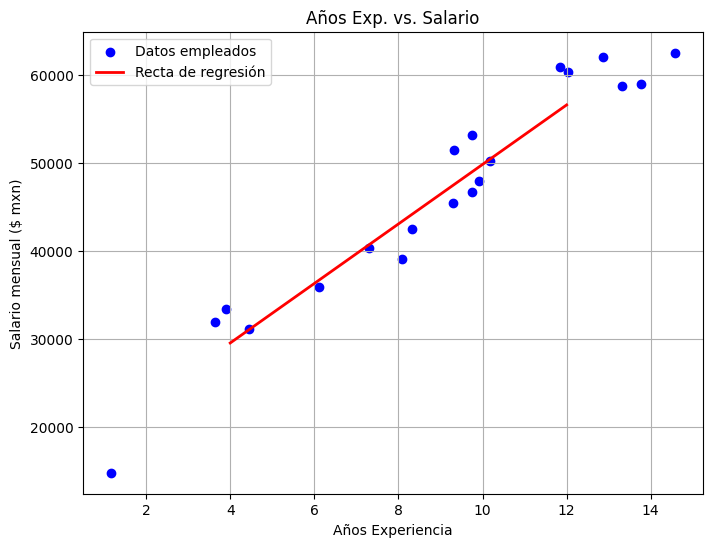

In [34]:
# ======================================================
# 4. GRÁFICO Y NUEVAS PREDICCIONES
# ======================================================
# Puntos para dibujar la recta del modelo en todo el dominio (4 a 12 horas)
X_linea = pd.DataFrame(np.linspace(4, 12, 100), columns=["Anios_Experiencia"])
y_pred_linea = modelo.predict(X_linea)

# Gráfico de dispersión y recta ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x='Anios_Experiencia', y='Salario', data=data, color='blue', label='Datos empleados')
plt.plot(X_linea, y_pred_linea, color='red', linewidth=2, label='Recta de regresión')
plt.title('Años Exp. vs. Salario')
plt.xlabel('Años Experiencia')
plt.ylabel('Salario mensual ($ mxn)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Generar predicciones para horas específicas
nuevos_anios = pd.DataFrame({'Anios_Experiencia': [2, 8, 10, 13, 18]})
nuevas_predicciones = modelo.predict(nuevos_anios)
predicciones_df = pd.DataFrame({'Horas_Trabajadas': nuevos_anios['Anios_Experiencia'], 'Desempeno_Predicho': nuevas_predicciones})

print("=== NUEVAS PREDICCIONES ===")
print(predicciones_df)
print("\n")

=== NUEVAS PREDICCIONES ===
   Horas_Trabajadas  Desempeno_Predicho
0                 2        22727.679764
1                 8        43021.808165
2                10        49786.517631
3                13        59933.581832
4                18        76845.355499




=== ESTADÍSTICAS DE RESIDUOS ===
Media de residuos: -0.0000
Desviación estándar de residuos: 3104.9041



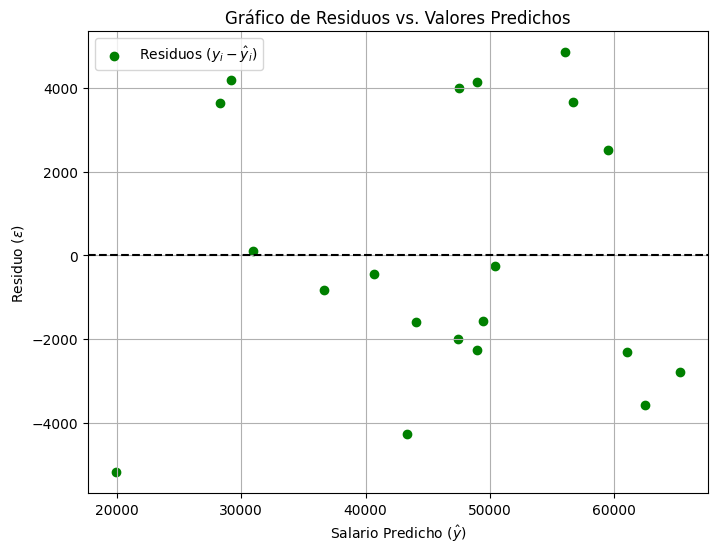

In [36]:
# ======================================================
# 5. ANÁLISIS DE RESIDUOS
# ======================================================
epsilon = y - y_pred  # El residuo es la diferencia entre el valor real y el predicho

media_epsilon = np.mean(epsilon)
estandar_epsilon = np.std(epsilon)

print("=== ESTADÍSTICAS DE RESIDUOS ===")
print(f"Media de residuos: {media_epsilon:.4f}")
print(f"Desviación estándar de residuos: {estandar_epsilon:.4f}\n")

# Gráfico de residuos para chequear homocedasticidad
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, epsilon, color='green', label='Residuos ($y_i - \\hat{y}_i$)')
plt.axhline(0, color='black', linestyle='--')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.xlabel('Salario Predicho ($\\hat{y}$)')
plt.ylabel('Residuo ($\\epsilon$)')
plt.grid(True)
plt.legend()
plt.show()

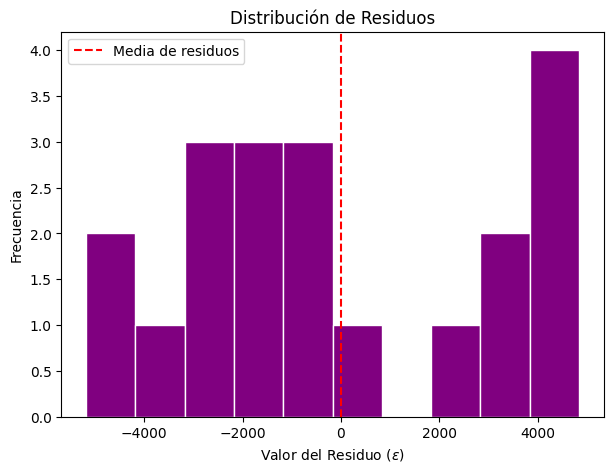

In [37]:
# Histograma de residuos para ver distribución
plt.figure(figsize=(7, 5))
plt.hist(epsilon, bins=10, color='purple', edgecolor='white')
plt.axvline(media_epsilon, color='red', linestyle='--', label='Media de residuos')
plt.title("Distribución de Residuos")
plt.xlabel('Valor del Residuo ($\\epsilon$)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()